In [1]:
# The code downloads the kaggle api to access the datasets present on Kaggle
%pip install kaggle

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\python_prasanth\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
# The code is used to import the required libraries required to manipulate and perform the dufferent operations required on data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
#The below code is used to read the dataset into the memory and display the sample data
medical_df=pd.read_csv(r'C:\Users\Surya\OneDrive\Documents\AzureLearnings\LinearRegression\DataSets\medical_cost.csv')
medical_df.head()

,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520


In [4]:
"""The code which will be implemented below will have set of user defined functions to
upon calling these functions, the program will go through the basic EDA operations"""
medical_df.info()
print(medical_df.describe())
print(f"The dataset has {medical_df.duplicated().sum()} Duplicated Records")
def EDA(input_df):
    def dataset_shape(input_df):
        return  f"The dataset has {input_df.shape[0]} Records and {input_df.shape[1]} Columns"
    def dataset_nullcount_columnwise(input_df):
        nullcount={}
        for column in input_df.columns:
            nullcount[column]=input_df[column].isnull().sum()
        return nullcount
    def dataset_datatypes(input_df):
        datatypes={}
        for column in input_df.columns:
            datatypes[column]=input_df[column].dtype
        return datatypes
    print(dataset_shape(medical_df))
    print(dataset_nullcount_columnwise(medical_df))
    print(dataset_datatypes(medical_df))
EDA(medical_df)
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB
                Id          age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000  1338.000000   1338.000000
mean    669.500000    39.207025    30.663397     1.094918  13270.422265
std     386.391641    14.049960     6.098187     1.205493  12110.011237
min       1.000000    18.000000    15.960000     0.000000   1121.873900
25%     335.250000    27.000000    26.296250     0.000000   4740.287150
50%     6

In [5]:
# The below code will convert the Object data types into the Category data types
for column in medical_df.select_dtypes(include='object').columns:
    medical_df[column]=medical_df[column].astype('category')

# Univariate Analysis

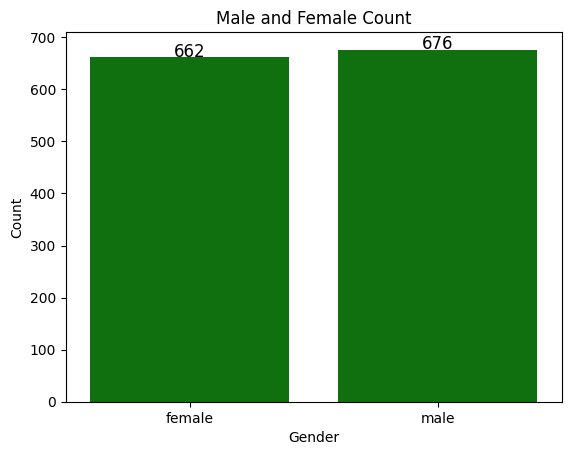

In [6]:
#The below code is used to understand the distribution of the sex count
ax = sns.countplot(medical_df, x='sex', color='Green')
for p in ax.patches:
    count = int(p.get_height())
    ax.text(p.get_x() + p.get_width() / 2.,
            count + 1,
            str(count),
            ha='center', fontsize=12)
plt.title("Male and Female Count")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


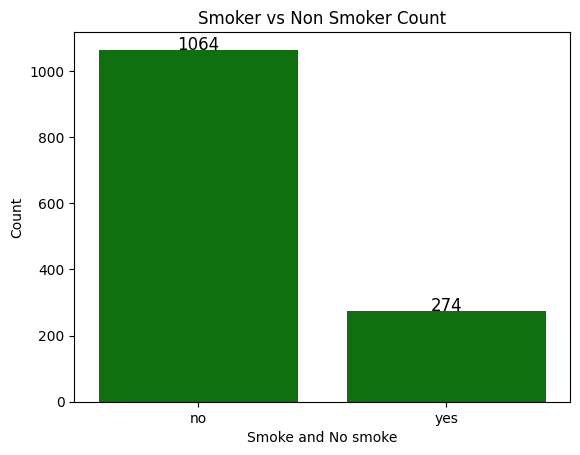

In [7]:
#The below code is used to understand the distribution of the sex count
ax = sns.countplot(medical_df, x='smoker', color='Green')
for p in ax.patches:
    count = int(p.get_height())
    ax.text(p.get_x() + p.get_width() / 2.,
            count + 1,
            str(count),
            ha='center', fontsize=12)
plt.title("Smoker vs Non Smoker Count")
plt.xlabel("Smoke and No smoke")
plt.ylabel("Count")
plt.show()


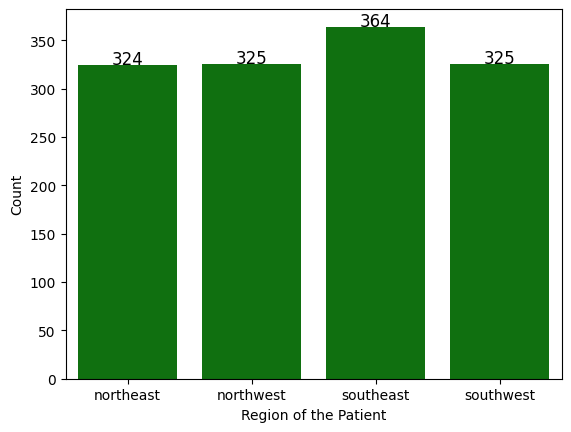

In [8]:
#The below code is used to understand the distribution of the sex count
ax = sns.countplot(medical_df, x='region', color='Green')
for p in ax.patches:
    count = int(p.get_height())
    ax.text(p.get_x() + p.get_width() / 2.,
            count + 1,
            str(count),
            ha='center', fontsize=12)
plt.title("")
plt.xlabel("Region of the Patient")
plt.ylabel("Count")
plt.show()

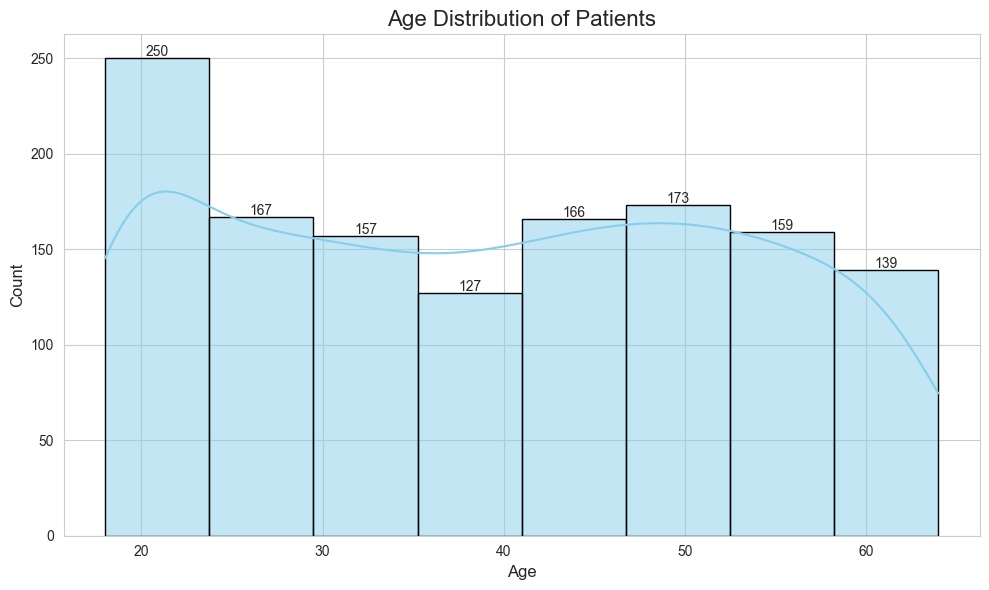

In [9]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
ax = sns.histplot(
    data=medical_df,
    x='age',
    bins=8,
    kde=True,
    color='skyblue',
    edgecolor='black'
)
plt.title("Age Distribution of Patients", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Count", fontsize=12)
for patch in ax.patches:
    count = int(patch.get_height())
    if count > 0:
        x = patch.get_x() + patch.get_width() / 2
        y = patch.get_height()
        ax.text(x, y + 1, str(count), ha='center', fontsize=10)

plt.tight_layout()
plt.show()


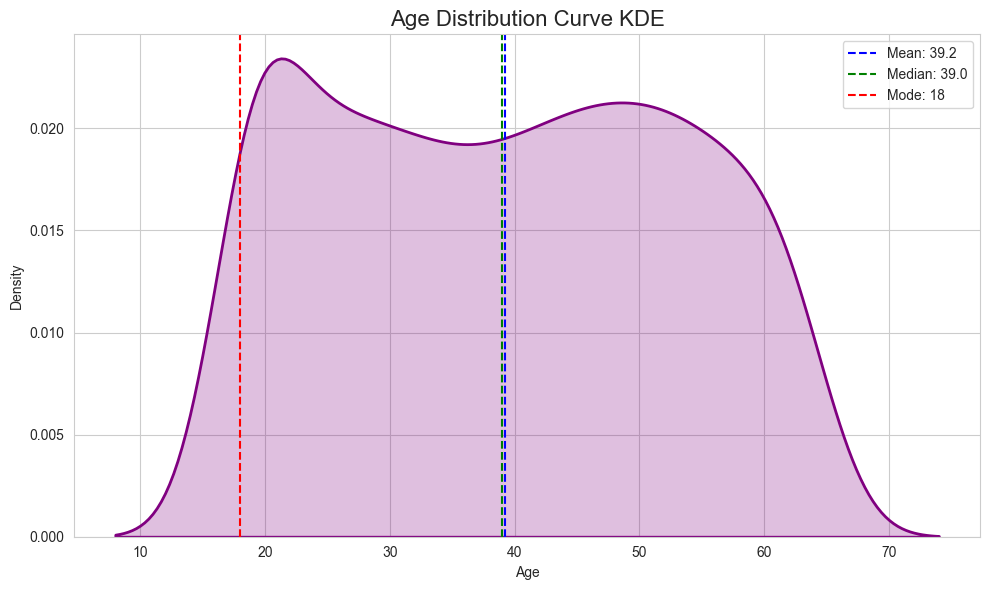

In [10]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.kdeplot(data=medical_df['age'], fill=True, color='purple', linewidth=2)
mean_val = medical_df['age'].mean()
median_val = medical_df['age'].median()
mode_val = medical_df['age'].mode()[0]
plt.axvline(mean_val, color='blue', linestyle='--', label=f"Mean: {mean_val:.1f}")
plt.axvline(median_val, color='green', linestyle='--', label=f"Median: {median_val:.1f}")
plt.axvline(mode_val, color='red', linestyle='--', label=f"Mode: {mode_val}")
plt.title("Age Distribution Curve KDE", fontsize=16)
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


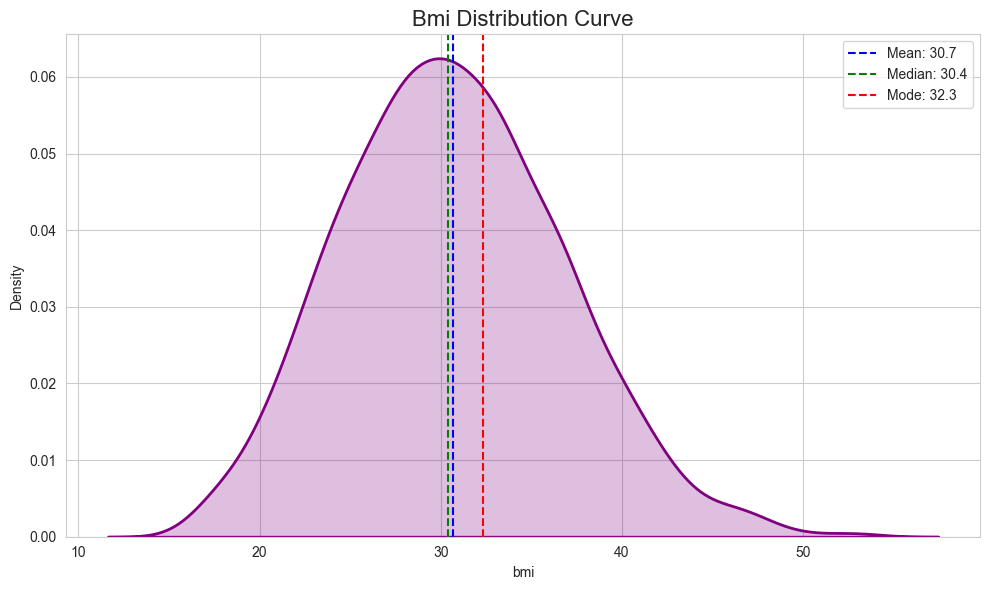

In [11]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.kdeplot(data=medical_df['bmi'], fill=True, color='purple', linewidth=2)
mean_val = medical_df['bmi'].mean()
median_val = medical_df['bmi'].median()
mode_val = medical_df['bmi'].mode()[0]
plt.axvline(mean_val, color='blue', linestyle='--', label=f"Mean: {mean_val:.1f}")
plt.axvline(median_val, color='green', linestyle='--', label=f"Median: {median_val:.1f}")
plt.axvline(mode_val, color='red', linestyle='--', label=f"Mode: {mode_val}")
plt.title("Bmi Distribution Curve", fontsize=16)
plt.xlabel("bmi")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

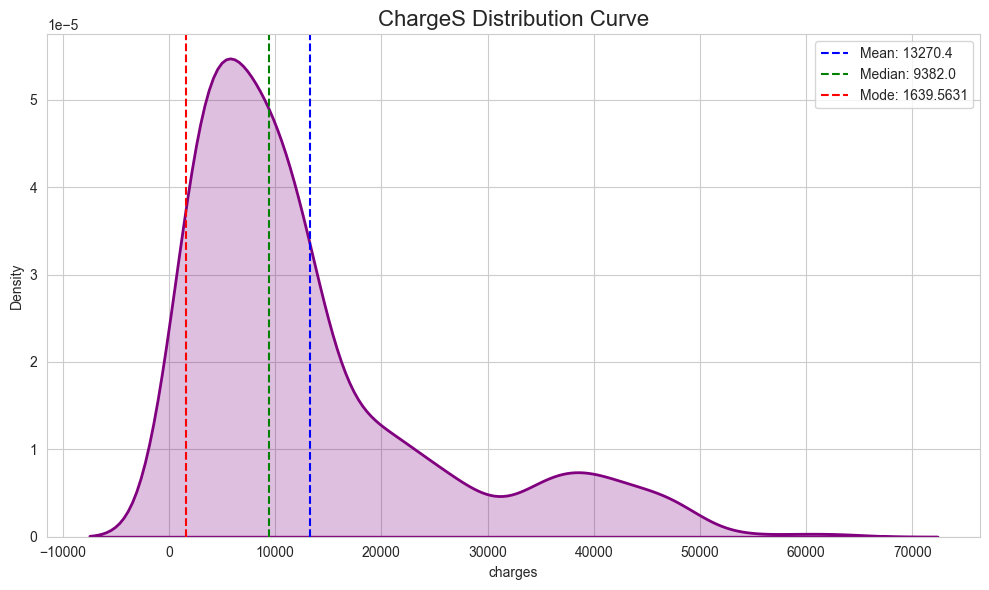

In [12]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.kdeplot(data=medical_df['charges'], fill=True, color='purple', linewidth=2)
mean_val = medical_df['charges'].mean()
median_val = medical_df['charges'].median()
mode_val = medical_df['charges'].mode()[0]
plt.axvline(mean_val, color='blue', linestyle='--', label=f"Mean: {mean_val:.1f}")
plt.axvline(median_val, color='green', linestyle='--', label=f"Median: {median_val:.1f}")
plt.axvline(mode_val, color='red', linestyle='--', label=f"Mode: {mode_val}")
plt.title("ChargeS Distribution Curve", fontsize=16)
plt.xlabel("charges")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

# Bivariate Analysis

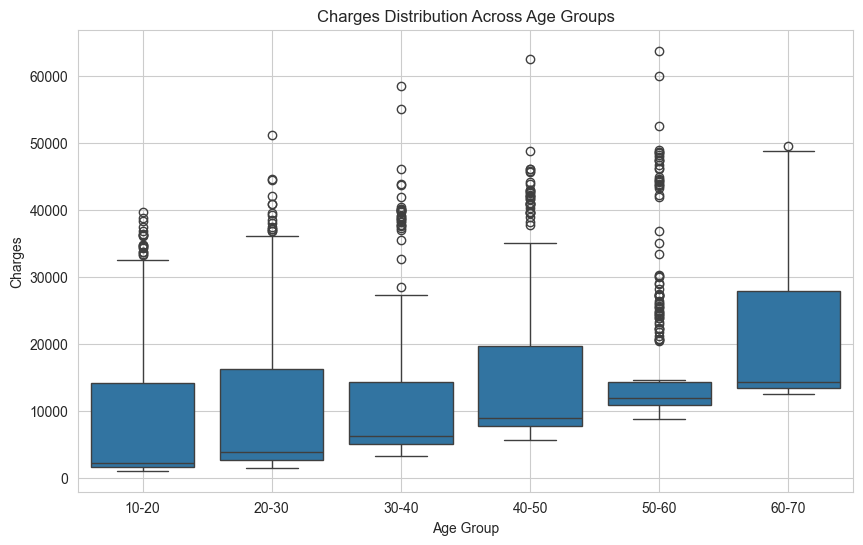

In [13]:
medical_df['age_bin'] = pd.cut(medical_df['age'], bins=[10, 20, 30, 40, 50, 60, 70], labels=["10-20", "20-30", "30-40", "40-50", "50-60", "60-70"])
plt.figure(figsize=(10, 6))
sns.boxplot(data=medical_df, x='age_bin', y='charges')
plt.title('Charges Distribution Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Charges')
plt.grid(True)
plt.show()


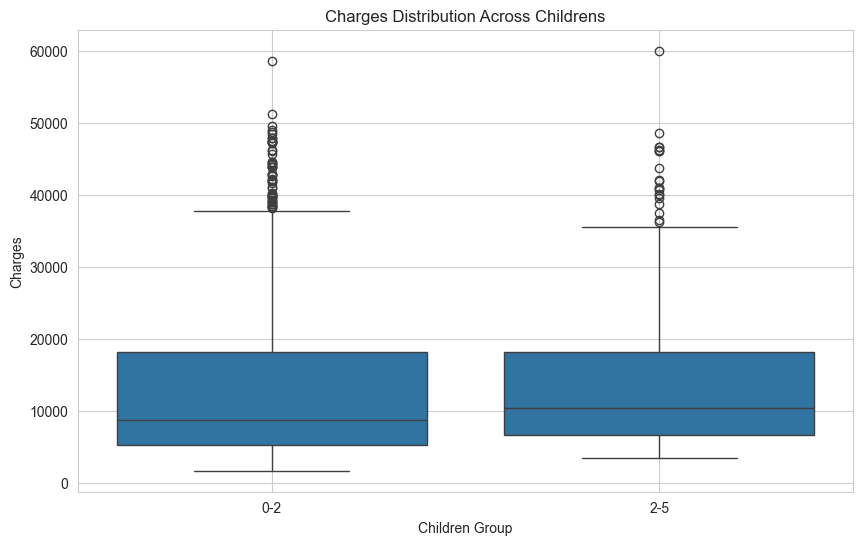

In [14]:
medical_df['children_bin'] = pd.cut(medical_df['children'], bins=[0,2,5], labels=["0-2","2-5"])
plt.figure(figsize=(10, 6))
sns.boxplot(data=medical_df, x='children_bin', y='charges')
plt.title('Charges Distribution Across Childrens')
plt.xlabel('Children Group')
plt.ylabel('Charges')
plt.grid(True)
plt.show()


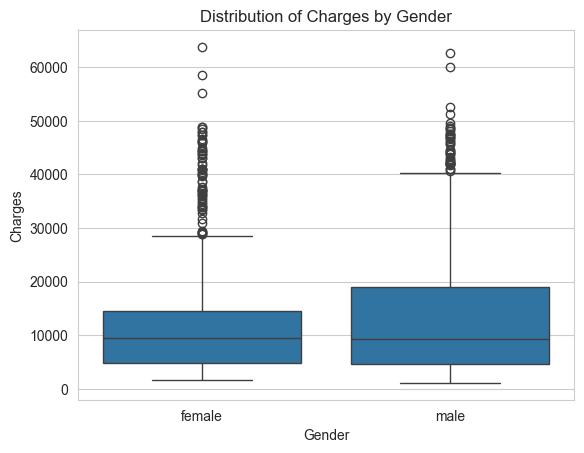

In [15]:
sns.boxplot(data=medical_df, x='sex', y='charges')
plt.title("Distribution of Charges by Gender")
plt.xlabel("Gender")
plt.ylabel("Charges")
plt.show()

In [16]:
medical_df.head()

,Id,age,sex,bmi,children,smoker,region,charges,age_bin,children_bin
0,1,19,female,27.900,0,yes,southwest,16884.92400,10-20,NaN
1,2,18,male,33.770,1,no,southeast,1725.55230,10-20,0-2
2,3,28,male,33.000,3,no,southeast,4449.46200,20-30,2-5
3,4,33,male,22.705,0,no,northwest,21984.47061,30-40,NaN
4,5,32,male,28.880,0,no,northwest,3866.85520,30-40,NaN


In [19]:
medical_df.corr(numeric_only=True)

,Id,age,bmi,children,charges
Id,1.000000,-0.031467,-0.036169,0.025221,-0.003373
age,-0.031467,1.000000,0.109272,0.042469,0.299008
bmi,-0.036169,0.109272,1.000000,0.012759,0.198341
children,0.025221,0.042469,0.012759,1.000000,0.067998
charges,-0.003373,0.299008,0.198341,0.067998,1.000000
